<a href="https://colab.research.google.com/github/minhhieu9800/Python-MSE/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment**
Họ tên: **Nguyễn Minh Hiếu**<br />
Mã học viên: **22MSE23062**<br />
Email: hieu22mse23062@fsb.edu.vn

## Nhúng thư viện cần thiết

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Lấy data từ đường dẫn

In [146]:
df = pd.read_csv('https://media.githubusercontent.com/media/minhhieu9800/Python-MSE/main/Data/train.csv')

In [147]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [149]:
df.shape

(9800, 18)

## **Trả lời câu hỏi**

### Tiền xử lý dữ liệu (xử lý các trường hợp thiếu dữ liệu, chuẩn hóa ngày tháng, đơn vị,...).

#### Xoá bỏ data trùng lặp

In [150]:
df.drop_duplicates()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


#### Xử lý data null

In [151]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [152]:
df[df['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [153]:
df['Postal Code'] = df['Postal Code'].fillna('L7L 0A1')

In [154]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [155]:
df[df['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


#### Xử lý định dạng ngày tháng

In [156]:
df['Order Date'] = pd.to_datetime(df['Order Date'],format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'],format='%d/%m/%Y')
df.sort_values(by=['Order Date'],inplace=True)

### Vẽ biểu đồ thể hiện biến động doanh số theo tháng. Cho biết doanh thu trung bình trong 3 tháng gần nhất.

#### Biểu đồ

In [157]:
df_by_month = df.groupby([df["Order Date"].rename("Year").dt.year, df["Order Date"].rename("Month").dt.month])["Sales"].sum().to_frame()

df_by_month["Time"] = df_by_month.index.to_numpy()
df_by_month['Time'] = df_by_month['Time'].astype(str)

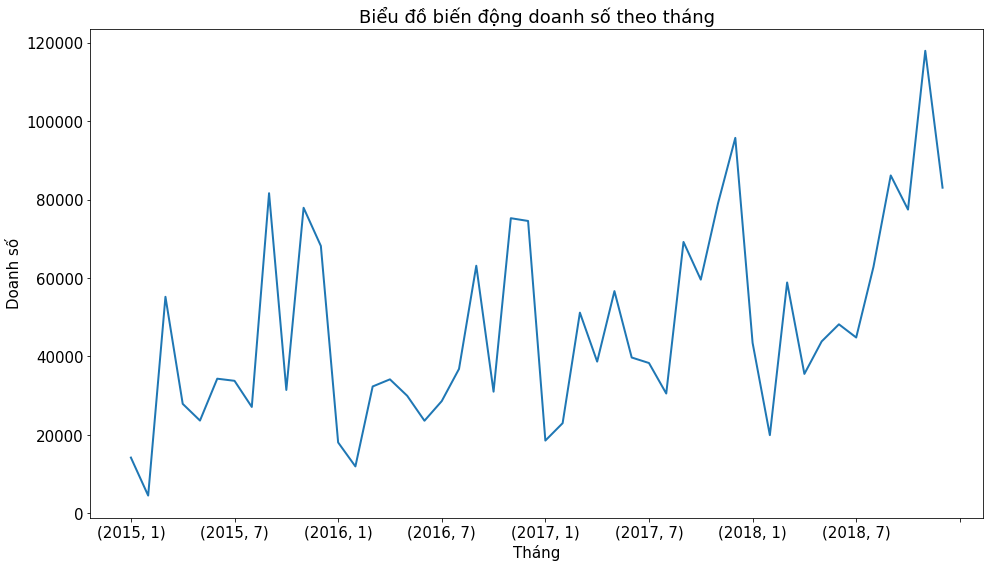

In [192]:
fig, ax = plt.subplots()

ax.plot(df_by_month["Time"], df_by_month["Sales"], linewidth=2.0)
ax.set(title='Biểu đồ biến động doanh số theo tháng', xlabel="Tháng", ylabel="Doanh số")
# plt.xticks(df_by_month["Time"])
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams['font.size'] = 15.0
plt.show()

#### Doanh số trung bình 3 tháng gần nhất

In [159]:
df_by_month_mean = df.groupby([df["Order Date"].dt.year, df["Order Date"].dt.month])["Sales"].mean()

In [160]:
df_by_month_mean.tail(3)

Order Date  Order Date
2018        10            263.429018
            11            258.636305
            12            180.894093
Name: Sales, dtype: float64

In [161]:
sales_last_three_months = df_by_month.tail(3).sum()
print("Doanh số trung bình 3 tháng gần nhất: " + str(sales_last_three_months))

Doanh số trung bình 3 tháng gần nhất: Sales                        278416.675
Time     (2018, 10)(2018, 11)(2018, 12)
dtype: object


### Vẽ biểu đồ doanh số bán hàng theo quý và cho biết quý nào có tổng doanh số cao nhất?

#### Biểu đồ

In [162]:
pd.plotting.register_matplotlib_converters()
df_by_quarter = df.groupby([df["Order Date"].rename("Quarter").dt.to_period('Q')])["Sales"].sum().reset_index()

In [163]:
df_by_quarter

,Quarter,Sales
0,2015Q1,73931.3960
1,2015Q2,85874.0936
2,2015Q3,142522.6063
3,2015Q4,177528.1122
4,2016Q1,62357.6870
5,2016Q2,87713.3730
6,2016Q3,128560.2072
7,2016Q4,180804.7382
8,2017Q1,92686.3650
9,2017Q2,135061.1610


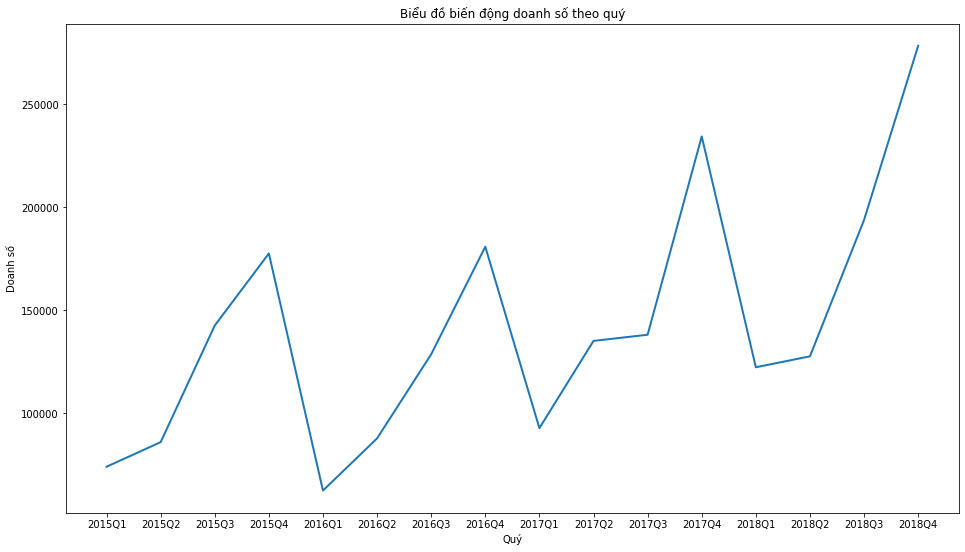

In [194]:
fig, ax = plt.subplots()

df_by_quarter["Quarter"]= df_by_quarter["Quarter"].astype(str)
ax.plot(df_by_quarter["Quarter"], df_by_quarter["Sales"], linewidth=2.0)
ax.set(title='Biểu đồ biến động doanh số theo quý', xlabel="Quý", ylabel="Doanh số")
plt.xticks(df_by_quarter["Quarter"])
plt.rcParams['font.size'] = 10.0
plt.rcParams["figure.figsize"] = [16,9]

plt.show()

#### Quý có doanh số cao nhất:

In [165]:
df_by_quarter.max()

Quarter        2018Q4
Sales      278416.675
dtype: object

In [166]:
print("Quý có doanh số cao nhất: " + str(df_by_quarter.max()["Quarter"]))

Quý có doanh số cao nhất: 2018Q4


### Tính thời gian giao hàng trung bình (ship date - order date) theo từng tháng và vẽ biểu đồ mô tả sự biến thiên của con số này.

#### Thời gian giao hàng trung bình theo từng tháng

In [167]:
df["Time Deliver"] = df["Ship Date"] - df["Order Date"]

In [206]:
df_time = df.groupby([df["Order Date"].rename("Year").dt.year, df["Order Date"].rename("Month").dt.month])["Time Deliver"].mean().to_frame()

df_time["Days"] = df_time["Time Deliver"].apply(lambda x: str(x).split('days')[0].strip())
df_time["Days"] = df_time['Days'].astype(int)


#### Biểu đồ

In [207]:
df_time["Time"] = df_time.index.to_numpy()
df_time['Time'] = df_time['Time'].astype(str)

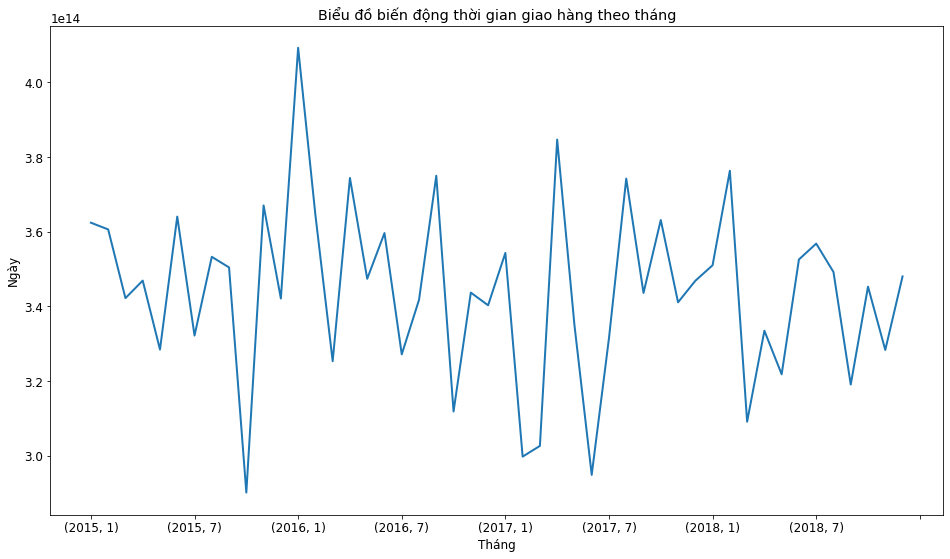

In [214]:
fig, ax = plt.subplots()

ax.plot(df_time["Time"], df_time["Time Deliver"], linewidth=2.0)
ax.set(title='Biểu đồ biến động thời gian giao hàng theo tháng', xlabel="Tháng", ylabel="Ngày")
# plt.xticks(df_by_month["Time"])
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams['font.size'] = 12.0
plt.show()

### Vẽ biểu đồ thể hiện sức mua theo từng thành phố. Cho biết top 3 thành phố có doanh số thấp nhất và 3 thành phố có doanh số cao nhất.

#### Biểu đồ

In [211]:
df_sales_city = df.groupby([df["City"]])["Sales"].sum().reset_index()

df_sales_city

,City,Sales
0,Aberdeen,25.500
1,Abilene,1.392
2,Akron,2724.244
3,Albuquerque,2220.160
4,Alexandria,5519.570
...,...,...
524,Woonsocket,195.550
525,Yonkers,7657.666
526,York,817.978
527,Yucaipa,50.800


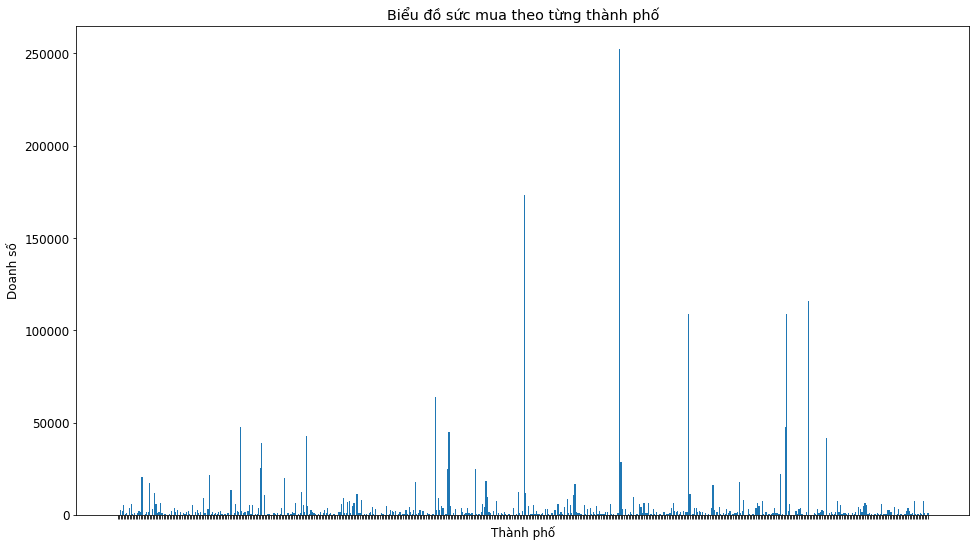

In [212]:
fig, ax = plt.subplots()

ax.bar(df_sales_city["City"], df_sales_city["Sales"])

ax.set_ylabel('Doanh số')
ax.set_xlabel('Thành phố')
ax.set_title('Biểu đồ sức mua theo từng thành phố')
# ax.legend(title='Fruit color')
ax.set_xticklabels([])
plt.show()

#### Top 3 thành phố có doanh số thấp nhất

In [174]:
df_sales_city = df_sales_city.sort_values("Sales", ascending=False)

In [175]:
df_sales_city.tail(3)

,City,Sales
221,Jupiter,2.064
140,Elyria,1.824
1,Abilene,1.392


#### Top 3 thành phố có doanh số cao nhất

In [176]:
df_sales_city.head(3)

,City,Sales
327,New York City,252462.547
265,Los Angeles,173420.181
450,Seattle,116106.322


### Vẽ biểu đồ thể hiện tỉ trọng doanh số theo bang (state) và cho biết trung bình doanh số của 5 bang dẫn đầu về sức mua.

#### Biểu đồ

In [199]:
df_sales_state = df.groupby([df["State"]])["Sales"].sum().reset_index()

df_sales_state

,State,Sales
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11678.1300
3,California,446306.4635
4,Colorado,31841.5980
5,Connecticut,13384.3570
6,Delaware,27322.9990
7,District of Columbia,2865.0200
8,Florida,88436.5320
9,Georgia,48219.1100


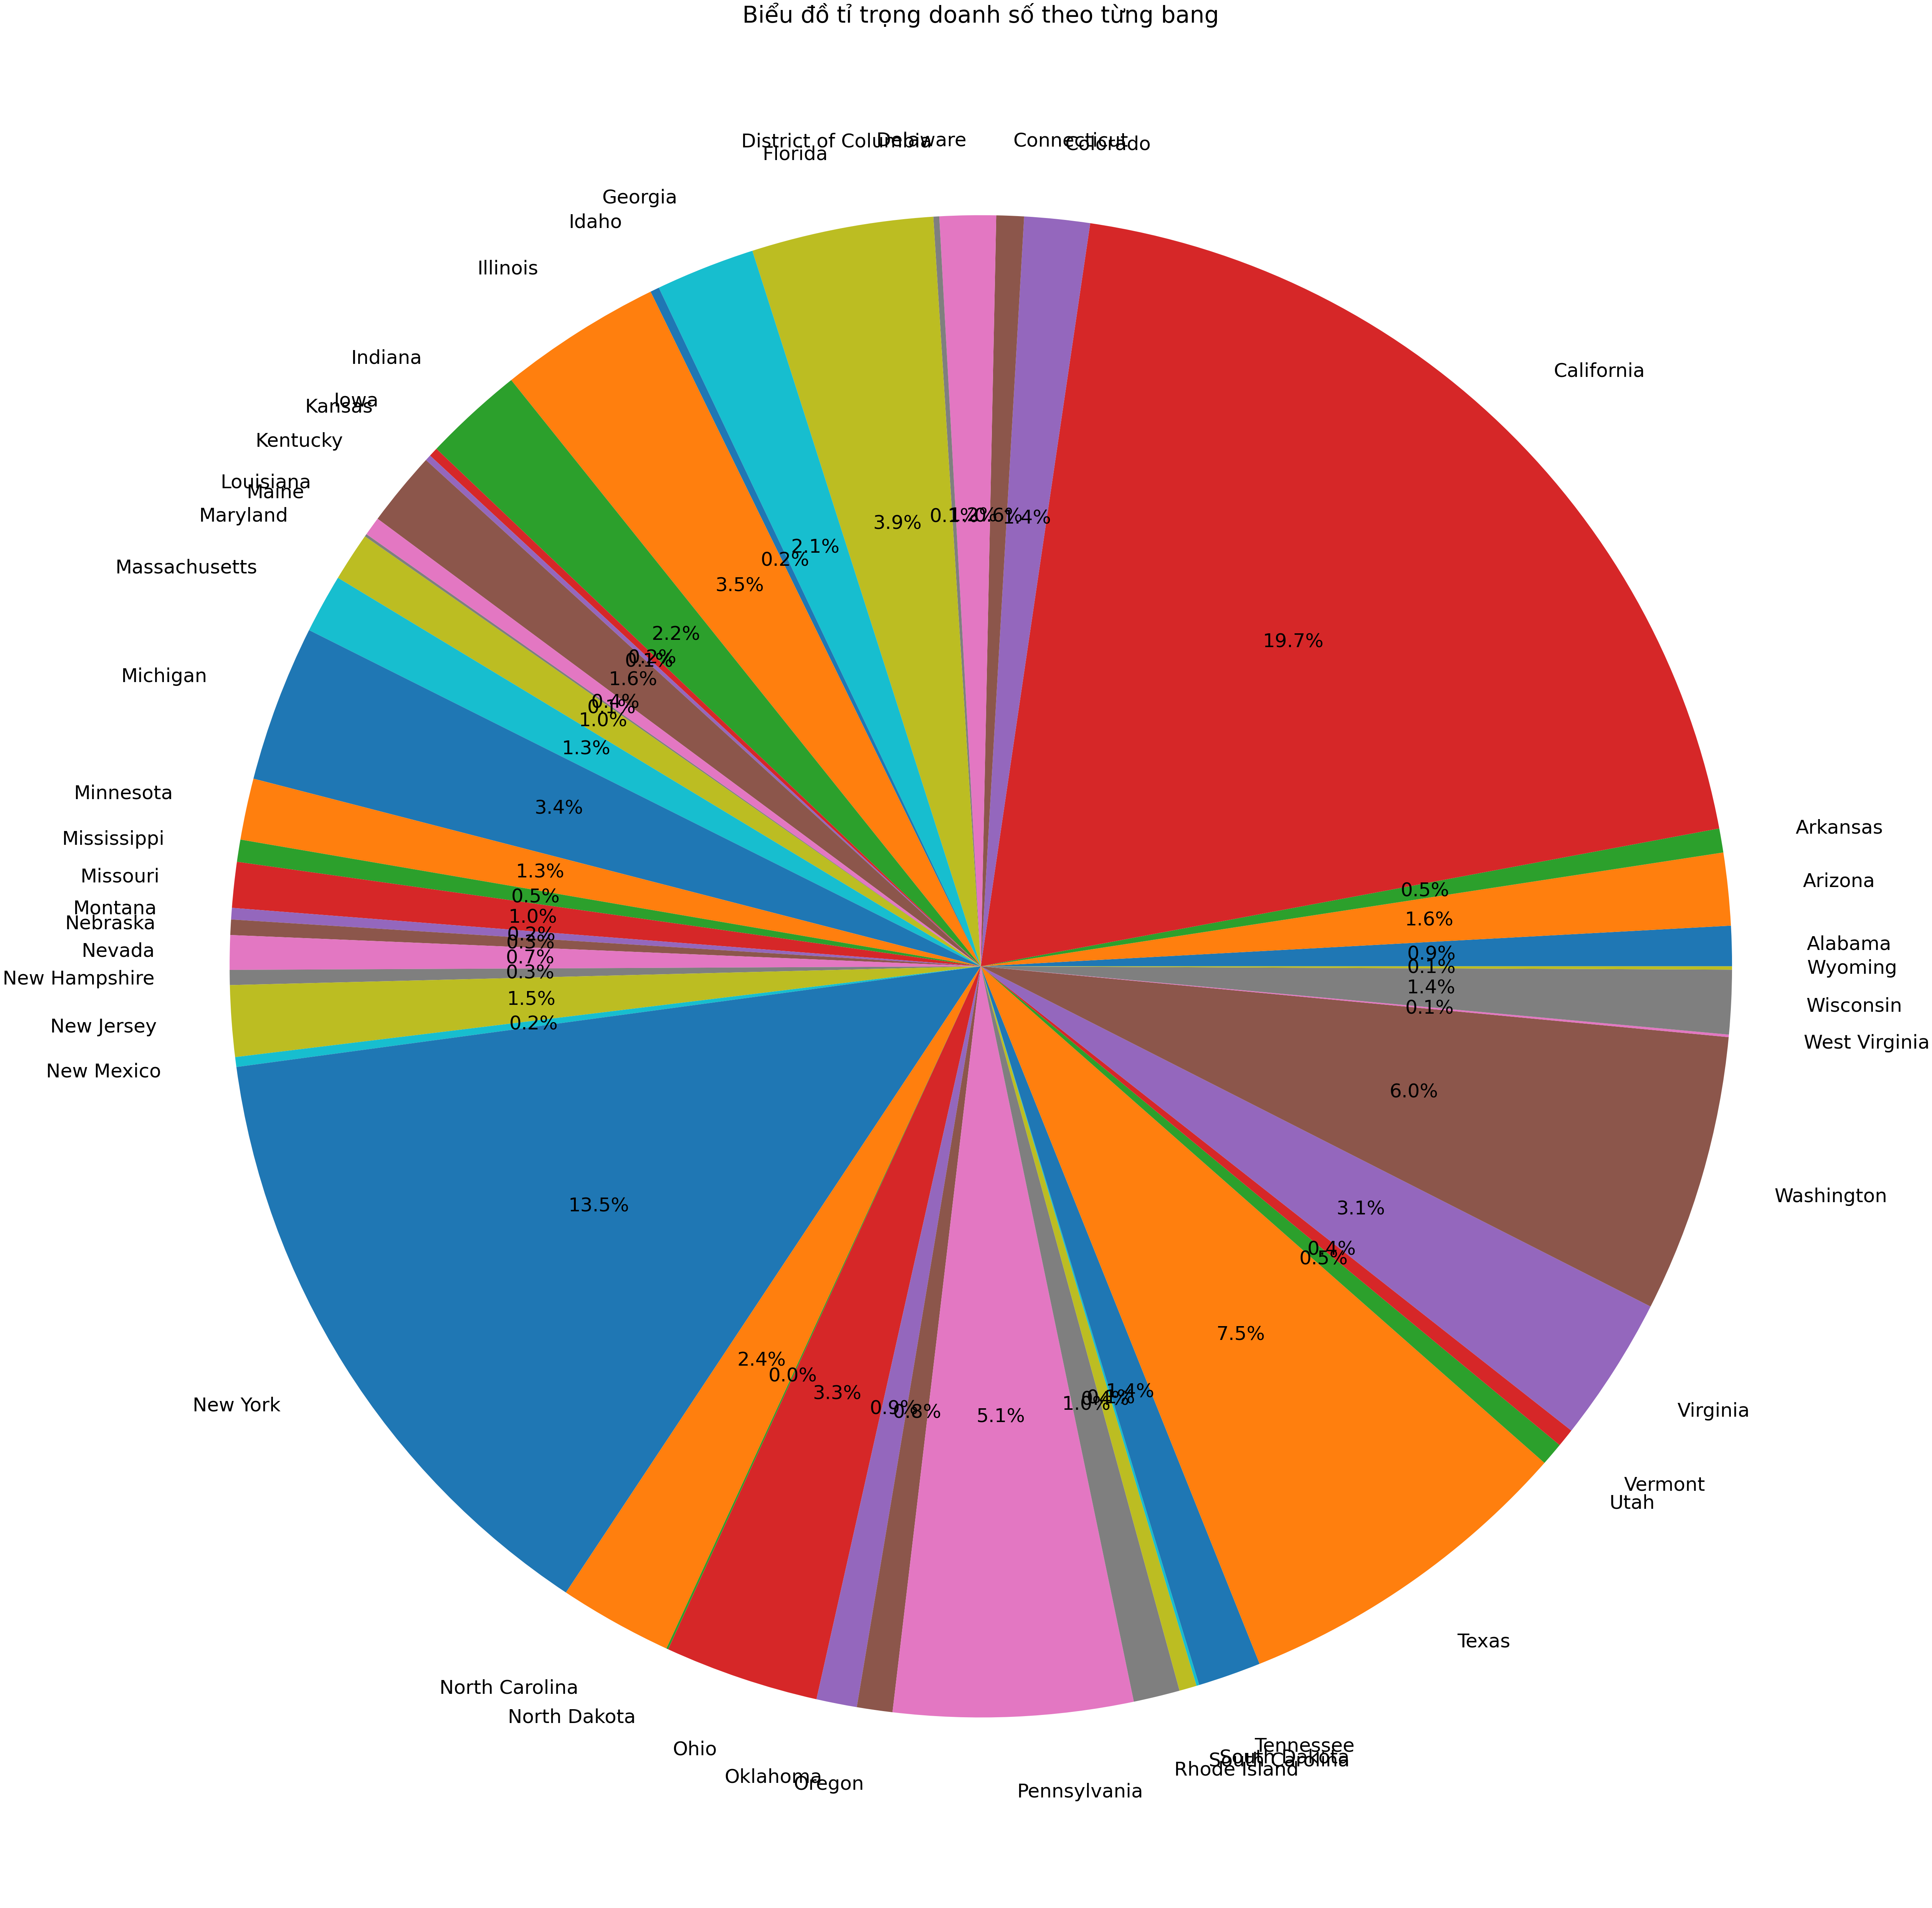

In [201]:
fig, ax = plt.subplots()
ax.pie(df_sales_state["Sales"], labels=df_sales_state["State"], autopct='%1.1f%%')
ax.set_title('Biểu đồ tỉ trọng doanh số theo từng bang')
plt.rcParams["figure.figsize"] = [160,90]
plt.rcParams['font.size'] = 50.0
plt.show()

#### Top 5 bang dẫn đầu về sức mua (trung bình doanh số)

In [179]:
df_sales_state_mean = df.groupby([df["State"]])["Sales"].mean().reset_index()
df_sales_state_mean = df_sales_state_mean.sort_values("Sales", ascending=False)

In [180]:
df_sales_state_mean.head(5)

,State,Sales
48,Wyoming,1603.136000
43,Vermont,811.760909
26,Nevada,428.951333
37,Rhode Island,409.545927
24,Montana,372.623467


### Cho biết các bang dẫn đầu doanh số theo từng vùng (east, west, south, central,..).

In [181]:
df_sales_region = df.groupby([df["Region"], df["State"]])["Sales"].sum().reset_index()

# df_sales_region = df.groupby([df["Region"]])["Sales"].sum().reset_index()

df_sales_region

,Region,State,Sales
0,Central,Illinois,79236.5170
1,Central,Indiana,48718.4000
2,Central,Iowa,4443.5600
3,Central,Kansas,2914.3100
4,Central,Michigan,76136.0740
5,Central,Minnesota,29863.1500
6,Central,Missouri,22205.1500
7,Central,Nebraska,7464.9300
8,Central,North Dakota,919.9100
9,Central,Oklahoma,19683.3900


#### Các bang dẫn đầu doanh số của vùng East

In [182]:
df_sales_east = df_sales_region.loc[df_sales_region["Region"] == "East"]

df_sales_east = df_sales_east.sort_values(by="Sales", ascending=False)

df_sales_east.head()

,Region,State,Sales
21,East,New York,306361.147
23,East,Pennsylvania,116276.650
22,East,Ohio,75130.350
20,East,New Jersey,34610.972
18,East,Massachusetts,28634.434


#### Các bang dẫn đầu doanh số của vùng West

In [183]:
df_sales_west = df_sales_region.loc[df_sales_region["Region"] == "West"]

df_sales_west = df_sales_west.sort_values(by="Sales", ascending=False)

df_sales_west.head()

,Region,State,Sales
39,West,California,446306.4635
47,West,Washington,135206.8500
38,West,Arizona,35272.6570
40,West,Colorado,31841.5980
45,West,Oregon,17284.4620


#### Các bang dẫn đầu doanh số của vùng South

In [184]:
df_sales_south = df_sales_region.loc[df_sales_region["Region"] == "South"]

df_sales_south = df_sales_south.sort_values(by="Sales", ascending=False)

df_sales_south.head()

,Region,State,Sales
29,South,Florida,88436.532
37,South,Virginia,70636.720
34,South,North Carolina,55165.964
30,South,Georgia,48219.110
31,South,Kentucky,36458.390


#### Các bang dẫn đầu doanh số của vùng Central

In [185]:
df_sales_central = df_sales_region.loc[df_sales_region["Region"] == "Central"]

df_sales_central = df_sales_central.sort_values(by="Sales", ascending=False)

df_sales_central.head()

,Region,State,Sales
11,Central,Texas,168572.5322
0,Central,Illinois,79236.5170
4,Central,Michigan,76136.0740
1,Central,Indiana,48718.4000
12,Central,Wisconsin,31173.4300


### Cho biết top 3 sản phẩm có doanh thu cao nhất và top 3 sản phẩm có số lượng đơn vị bán ra cao nhất.

#### Top 3 sản phẩm có doanh thu cao nhất

In [186]:
df_product = df.groupby([df["Product ID"],df["Product Name"]])["Sales"].sum().reset_index()

df_product = df_product.sort_values(by="Sales", ascending=False)

df_product.head(3)

,Product ID,Product Name,Sales
1639,TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,61599.824
787,OFF-BI-10003527,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
1668,TEC-MA-10002412,Cisco TelePresence System EX90 Videoconferenci...,22638.480


#### Top 3 sản phẩm có số lượng đơn vị bán ra cao nhất

In [187]:
df_product = df.groupby([df["Product ID"],df["Product Name"]])["Sales"].count().reset_index()

df_product.columns = ["Product ID","Product Name","Count"] 

df_product = df_product.sort_values(by="Count", ascending=False)

df_product.head(3)

,Product ID,Product Name,Count
95,FUR-CH-10002647,"Situations Contoured Folding Chairs, 4/Set",15
1590,TEC-AC-10003628,Logitech 910-002974 M325 Wireless Mouse for We...,15
704,OFF-BI-10001524,GBC Premium Transparent Covers with Diagonal L...,14


### Vẽ biểu đồ thể hiện tỉ trọng doanh số của từng category.

In [188]:
df_category = df.groupby([df["Category"]])["Sales"].count().reset_index()

df_category

,Category,Sales
0,Furniture,2078
1,Office Supplies,5909
2,Technology,1813


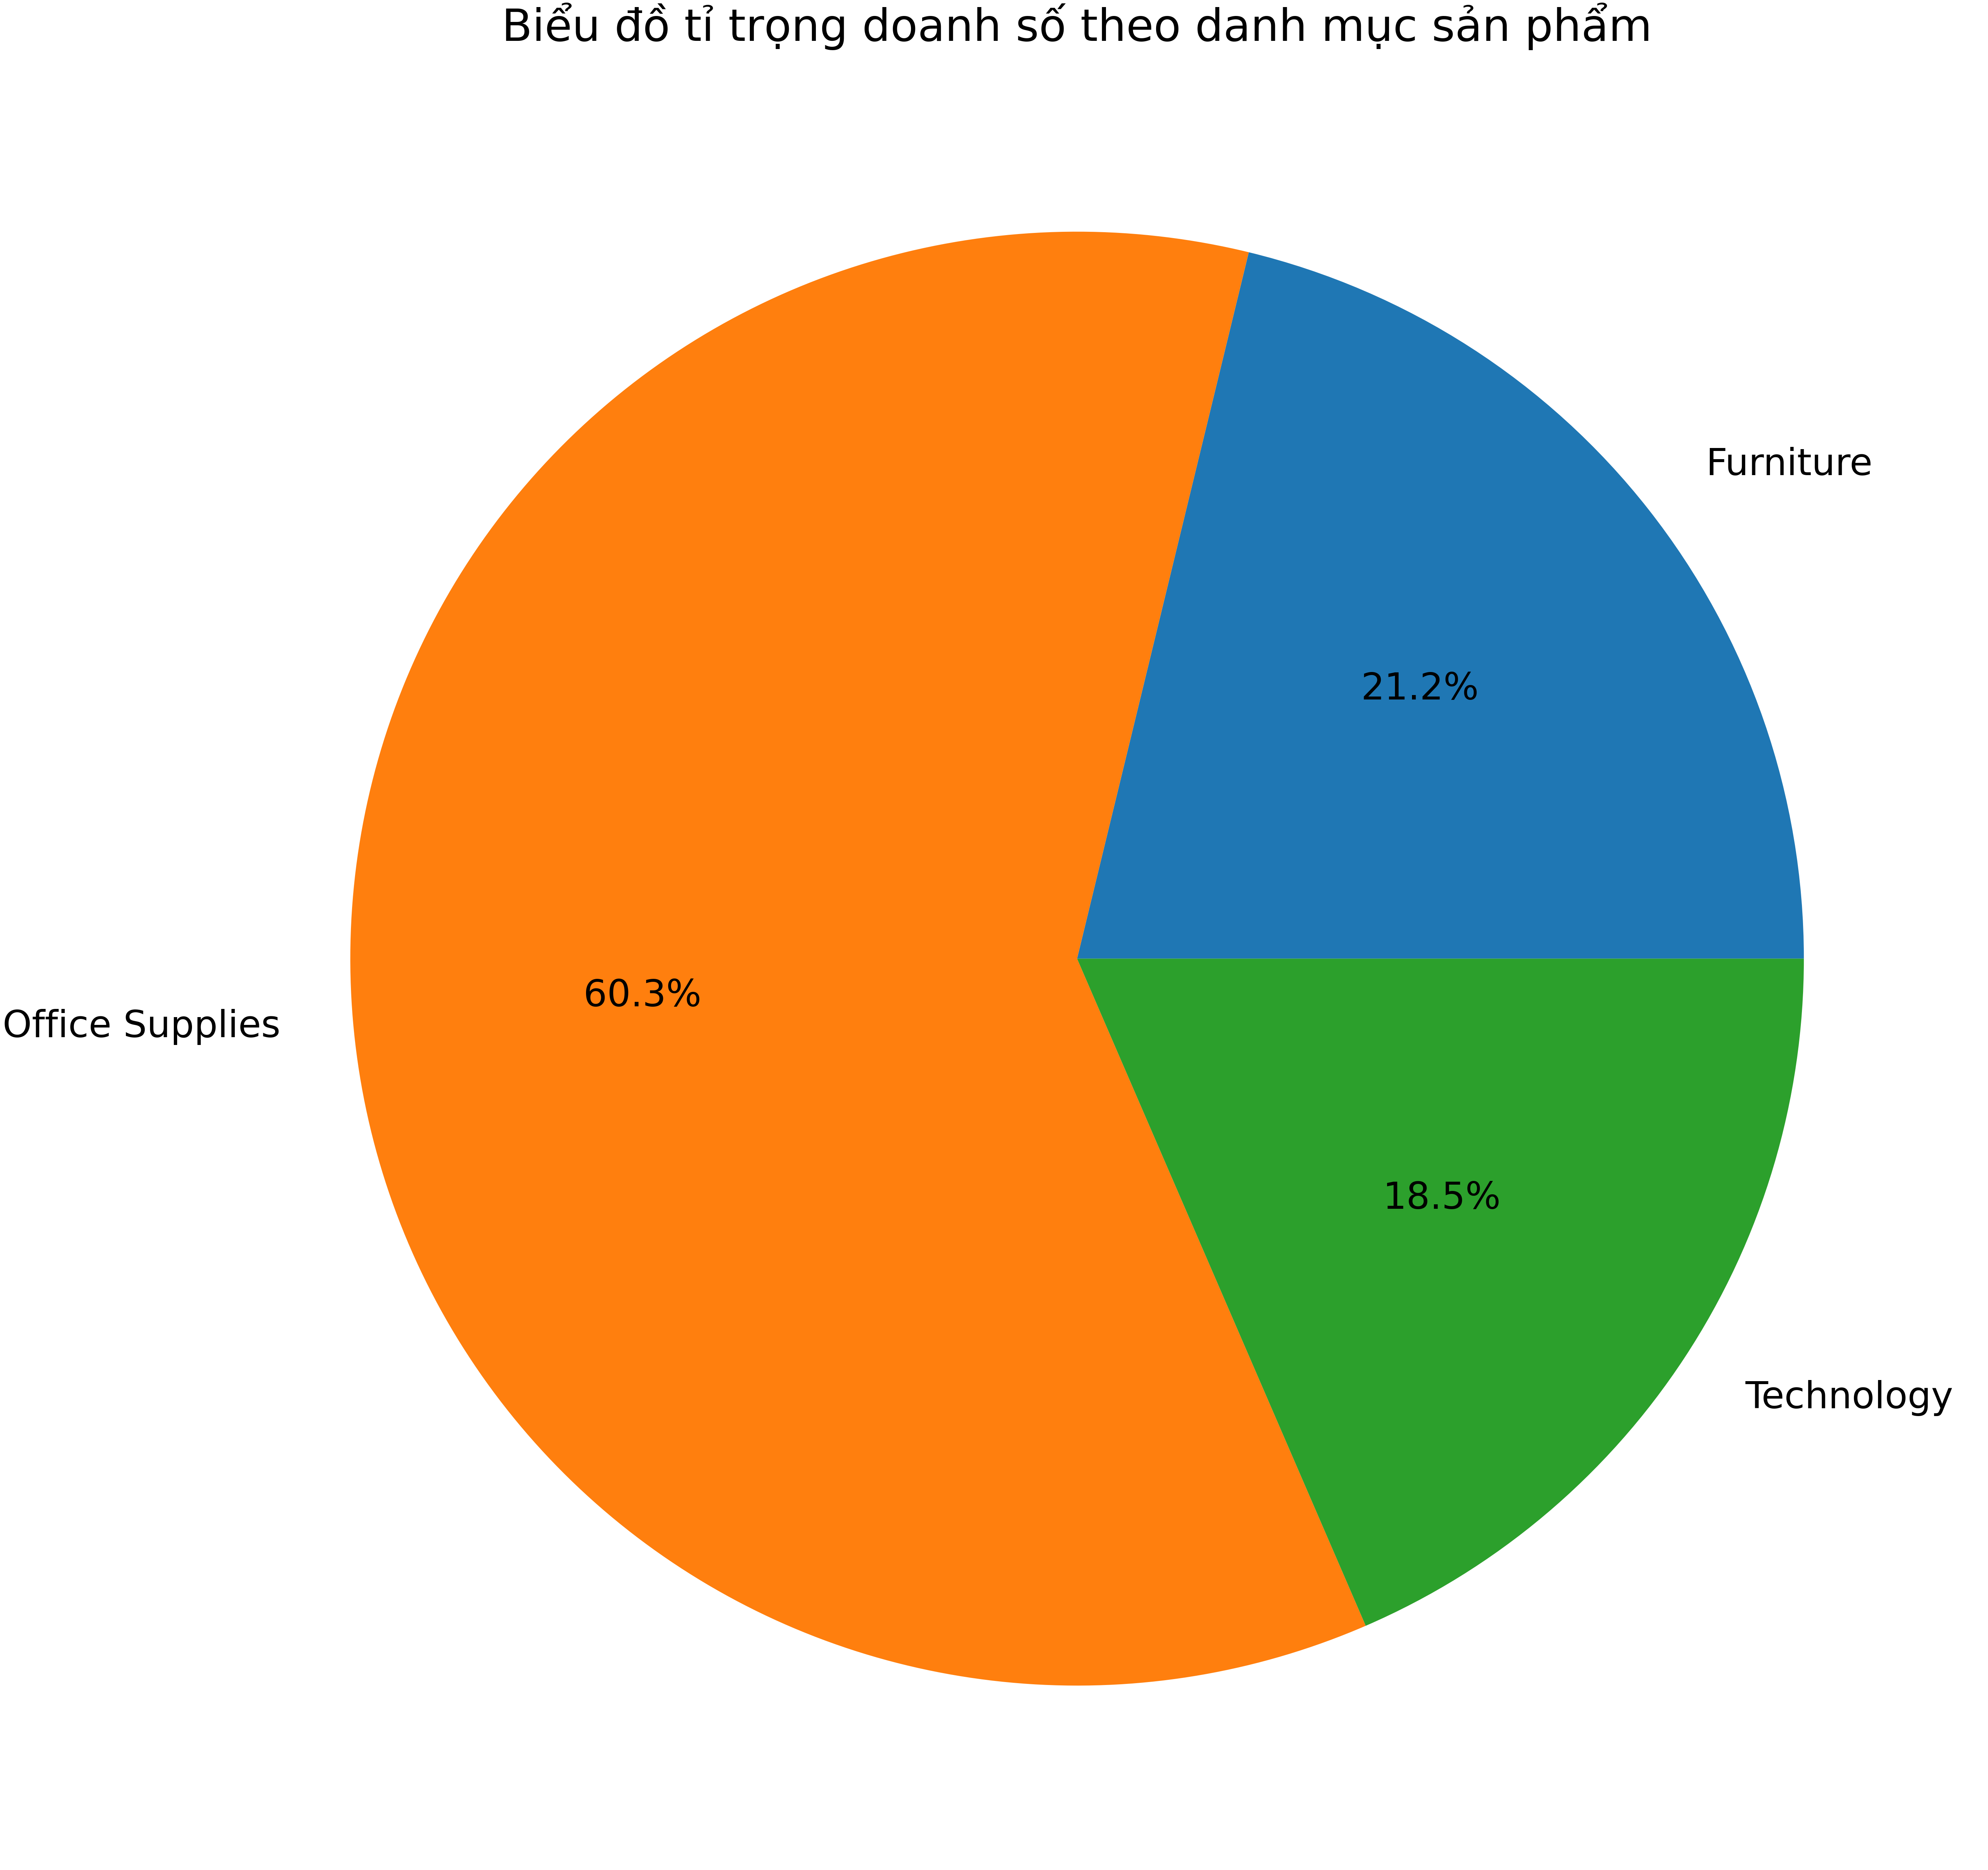

In [205]:
fig, ax = plt.subplots()
ax.pie(df_category["Sales"], labels=df_category["Category"], autopct='%1.1f%%')
ax.set_title("Biểu đồ tỉ trọng doanh số theo danh mục sản phẩm")
plt.rcParams['font.size'] = 100.0
plt.show()

### Dự báo doanh số theo nhiều khía cạnh khác nhau trong tương lai: theo vùng, theo bang, theo category,..  và phát hành API để khai thác.